In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import SilhouetteScore
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         46.654169        85.262821         4.883670        37.038746   
1         57.107640        61.473856        35.281434        36.211638   
2          4.422834        12.488599        38.224497        45.172775   
3         15.451764        37.382189        51.933767        59.518307   
4         37.461115        39.506071        44.860652        52.592196   
5         66.075568        75.691305        21.087892        68.282679   
6          2.114622        40.109738        55.276632        62.432568   
7         33.900237        67.601587        21.873196        31.139739   
8          3.565017        73.882020         4.209790        65.064928   
9         17.306491        76.969155         4.725789        91.942878   
10        28.902700        30.150640         5.963038        93.751

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[1 0 2 0 0 1 2 0 3 3 3 1 3 2 0 0 0 0 0 0 0 3 1 2 0 0 2 0 1 1]
0.17775060755408492


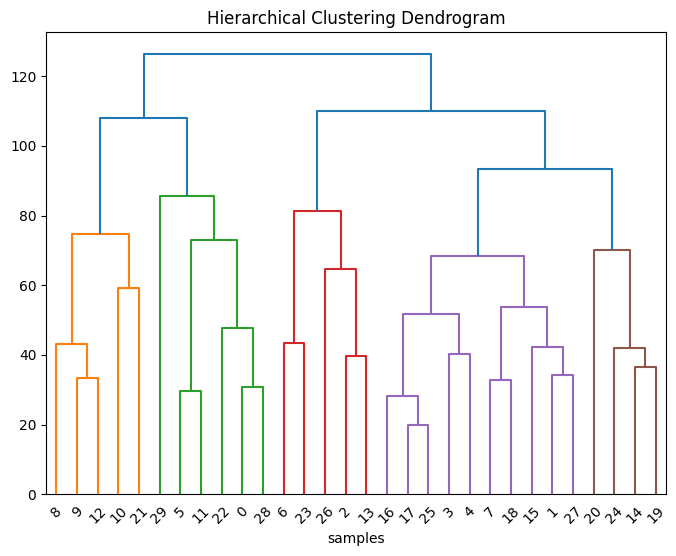

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.28166573, 0.11499213, 0.28812383, 0.31521832],
       [0.18428503, 0.21869926, 0.19024056, 0.40677515],
       [0.30333626, 0.16555594, 0.29152457, 0.23958322],
       [0.20381914, 0.3933098 , 0.19950106, 0.20336999],
       [0.187191  , 0.41551896, 0.18707786, 0.21021218],
       [0.23412685, 0.28349222, 0.24290159, 0.23947934],
       [0.3022779 , 0.20739435, 0.28797659, 0.20235117],
       [0.1868947 , 0.21250637, 0.19399233, 0.40660659],
       [0.32459365, 0.12065168, 0.32324504, 0.23150962],
       [0.28294308, 0.22137681, 0.29007882, 0.20560129],
       [0.31090941, 0.17780775, 0.30431062, 0.20697222],
       [0.15863907, 0.48910611, 0.16238075, 0.18987406],
       [0.35156917, 0.13203243, 0.36366578, 0.15273262],
       [0.31648972, 0.14562525, 0.30750027, 0.23038476],
       [0.18531271, 0.45363183, 0.18551275, 0.17554271],
       [0.21185956, 0.088139  , 0.21702668, 0.48297476],
       [0.22569766, 0.23840104, 0.2259991 , 0.30990221],
       [0.21847045, 0.27881407,

In [5]:
model.get_crisp_assignments()

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.1640910232132004


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (0, 0) has these sample indices => [0, 12, 15, 27, 28]
Neuron (0, 1) has these sample indices => [1, 3, 4, 5, 7, 11, 14, 16, 17, 18, 19, 22, 24, 25]
Neuron (1, 0) has these sample indices => [2, 6, 8, 10, 13, 21, 23, 26, 29]
Neuron (1, 1) has these sample indices => [9, 20]


In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (1, 0) has these sample indices => [0, 5, 9, 15, 21, 22, 28, 29]
Neuron (1, 1) has these sample indices => [1, 7, 11, 18, 27]
Neuron (0, 0) has these sample indices => [2, 6, 8, 10, 12, 13, 23, 26]
Neuron (0, 1) has these sample indices => [3, 4, 14, 16, 17, 19, 20, 24, 25]
